# This notebook goes with Lesson 10, Section 5 of the Tensorflow 2.0 course on Udacity. It uses LSTM neural networks for NLP.

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P -O /tmp/sentiment.csv

--2020-12-09 16:55:43--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 172.217.6.78, 2607:f8b0:4005:80a::200e
Connecting to drive.google.com (drive.google.com)|172.217.6.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2r3ok9qgmj1nhaelokmq85eq8v2bvcop/1607532900000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-12-09 16:55:43--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2r3ok9qgmj1nhaelokmq85eq8v2bvcop/1607532900000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 172.217.6.65, 2607:f8b0:4005:80a::2001
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|172.217.6.65|:443... 

In [17]:
import pandas as pd
dataset = pd.read_csv('/tmp/sentiment.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [18]:
for x in range(2):
    print(sentences[x])
    print(labels[x])
    print('\n')

So there is no way for me to plug it in here in the US unless I go by a converter.
0


Good case Excellent value.
1




In [19]:
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, 
                                                                     max_subword_length=5)
print("Vocab size is ", tokenizer.vocab_size)

Vocab size is  999


In [20]:
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [21]:
for i in encoded:
    print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


## Replace sentences with encoded subwords

In [22]:
for i, sentence in enumerate(sentences):
    sentences[i] = tokenizer.encode(sentence)


In [23]:
print(sentences[5])

[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


## Final Preprocessing

In [24]:
import numpy as np

max_length = 50
trunc_type = 'post'
padding_type = 'post'

sequences_padded = pad_sequences(sentences,
                                maxlen=max_length,
                                padding=padding_type,
                                truncating=trunc_type)

training_size = int(len(sentences)*0.8)

training_sequences = sequences_padded[0:training_size]
training_labels = labels[0:training_size]

testing_sequences = sequences_padded[training_size:]
testing_labels = labels[training_size:]

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Create the model using an Embedding

In [25]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,
                             embedding_dim,
                             input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [26]:
num_epochs = 30

model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

history = model.fit(training_sequences, training_labels_final, epochs=num_epochs,
                   validation_data = (testing_sequences, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.5248 - val_loss: 0.6968 - val_accuracy: 0.4160
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5361 - val_loss: 0.6969 - val_accuracy: 0.4386
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5700 - val_loss: 0.6929 - val_accuracy: 0.4812
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5876 - val_loss: 0.6858 - val_accuracy: 0.5138
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6535 - val_loss: 0.6683 - val_accuracy: 0.5689
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7112 - val_loss: 0.6419 - val_accuracy: 0.6992
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7652 - val_loss: 0.6231 - val_accuracy: 0.7018
Epoch 8/30
50/50 [==

## Plot accuracy and loss

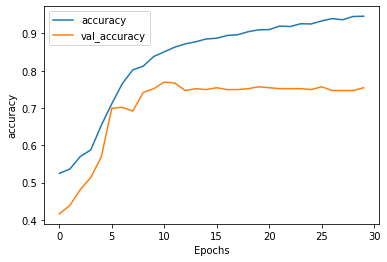

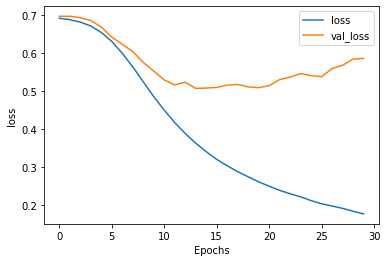

In [29]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy') 
plot_graphs(history, 'loss')

## Define prediction function

In [30]:
def predict_review(model, new_sentences, maxlen=max_length, show_padded_sequence=True):
    new_sequences = []
    for i, frvw in enumerate(new_sentences):
        new_sequences.append(tokenizer.encode(frvw))
    
    trun_type='post'
    padding_type='post'
    
    new_reviews_padded = pad_sequences(new_sequences, maxlen=maxlen,
                                      padding=padding_type, truncating=trunc_type)
    classes=model.predict(new_reviews_padded)
    
    for x in range(len(new_sentences)):
        if (show_padded_sequence):
            print(new_reviews_padded[x])
        print(new_sentences[x])
        print(classes[x])
        print('\n')

In [32]:
fake_reviews = ["I love this phone", 
                "Everything was cold",
                "Everything was hot exactly as I wanted", 
                "Everything was green", 
                "the host seated us immediately",
                "they gave us free chocolate cake", 
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]

predict_review(model, fake_reviews)

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9122219]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.11138538]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.31955737]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.09683877]


[  1 109 228 540 237 635 24

## Streamline the process by defining functions!

In [38]:
def fit_model_now(model, sentences):
    model.compile(optimizer = 'adam',
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    model.summary()
    history = model.fit(training_sequences, training_labels_final, epochs=num_epochs,
                       validation_data=(testing_sequences, testing_labels_final))
    return history

def plot_results(history):
    plot_graphs(history, 'accuracy')
    plot_graphs(history, 'loss')
    
def fit_model_and_show_results(model, sentences):
    history = fit_model_now(model, sentences)
    plot_results(history)
    predict_review(model, sentences)

## Add Bidirectional LSTM

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 2s 40ms/step - loss: 0.6910 - accuracy: 0.5217 - val_loss: 0.6989 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 1s 24ms/step - loss: 0.6662 - accuracy: 0.5744 - val_lo

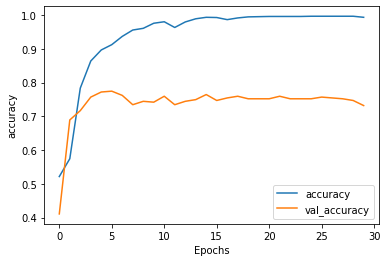

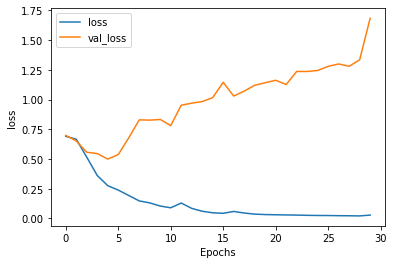

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9977865]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.00966284]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.9845289]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.01563141]


[  1 109 228 540 237 635 241

In [39]:
model_bidi_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,
                             embedding_dim,
                             input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

fit_model_and_show_results(model_bidi_LSTM, fake_reviews)

## Try TWO bidirectional LSTM layers

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 26,701
Trainable params: 26,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 4s 77ms/step - loss: 0.6916 - accuracy: 0.5223 - val_loss: 0.695

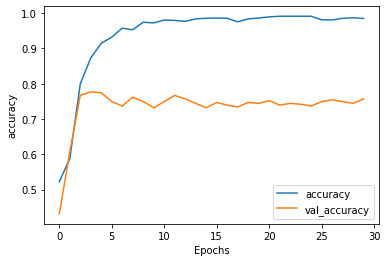

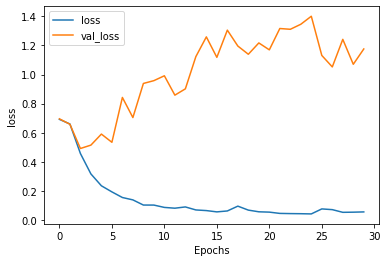

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9996613]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.0131363]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.98130786]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.01770741]


[  1 109 228 540 237 635 241

In [40]:
model_double_LSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,
                             embedding_dim,
                             input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

fit_model_and_show_results(model_double_LSTM, fake_reviews)